In [19]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------
# 1. Load the results ------------------------------------------------
# ------------------------------------------------------------------
pickle_file  = "/nfs/home/colinn/Report_AC/Report_TIM_Bayes/Danni_all_results.pkl"

with open(pickle_file, 'rb') as f:
    results = pickle.load(f)

pickle_file2  = "/nfs/home/colinn/Report_AC/Report_TIM_Bayes/TIM_opt_vary_alpha_results_20250519_041816/all_results.pkl"

with open(pickle_file2, 'rb') as f:
    results_a = pickle.load(f)


pickle_file3  = "/nfs/home/colinn/Report_AC/Report_TIM_Bayes/TIM_opt_vary_theta_results_20250519_055002/all_results.pkl"

with open(pickle_file3, 'rb') as f:
    results_t = pickle.load(f)

pickle_file4  = "/nfs/home/colinn/Report_AC/Report_TIM_Bayes/TIM_opt_results_20250518_183719/all_results.pkl"

with open(pickle_file4, 'rb') as f:
    results_s = pickle.load(f)

pickle_file5  = "/nfs/home/colinn/Report_TIM/TIM_delta_results_20250514_003126/aggregated_results.pkl"

with open(pickle_file5, 'rb') as f:
    results_test = pickle.load(f)

pickle_file6  = "/nfs/home/colinn/Report_AC/Report_TIM/TIM_alpha_results_20250520_125144/aggregated_results.pkl"

with open(pickle_file6, 'rb') as f:
    results_alpha = pickle.load(f)

pickle_file7  = "/nfs/home/colinn/Report_AC/Report_TIM/TIM_theta_results_20250520_161307/aggregated_results.pkl"

with open(pickle_file7, 'rb') as f:
    results_theta = pickle.load(f)

In [14]:
for i in results_alpha.keys():
    print(i, results_alpha[i].keys())

0.4 dict_keys(['inventory_runs', 'trade_runs', 'obj_vals', 'solve_times', 'tail_probs'])
0.5 dict_keys(['inventory_runs', 'trade_runs', 'obj_vals', 'solve_times', 'tail_probs'])
0.6 dict_keys(['inventory_runs', 'trade_runs', 'obj_vals', 'solve_times', 'tail_probs'])


In [5]:
for i in results.keys():
    trade_plots = results[i]['obj']
    #print(trade_plots)
    mean_traj = np.array(trade_plots).mean(axis=0)
    std_traj  = np.array(trade_plots).std(axis=0)
    print(i, mean_traj, std_traj)
# for i in results_a.keys():
# #     trade_plots = results_a[i]['obj']
# #     print(trade_plots)
# #     mean_traj = np.array(trade_plots).mean(axis=0)
# #     std_traj  = np.array(trade_plots).std(axis=0)
# #     print(i, mean_traj, std_traj)
# # for i in results_t.keys() :
# #     trade_plots = results_t[i]['obj']
# #     print(trade_plots)
# #     mean_traj = np.array(trade_plots).mean(axis=0)
# #     std_traj  = np.array(trade_plots).std(axis=0)
# #     print(i, mean_traj, std_traj)
# # for i in results_s.keys() :
# #     trade_plots = results_s[i]['obj']
# #     print(trade_plots)
# #     mean_traj = np.array(trade_plots).mean(axis=0)
# #     std_traj  = np.array(trade_plots).std(axis=0)
# #     print(i, mean_traj, std_traj)
# # for i in results_test.keys() :
# #     trade_plots = results_test[i]['obj_vals']
# #     print(trade_plots)
# #     mean_traj = np.array(trade_plots).mean(axis=0)
# #     std_traj  = np.array(trade_plots).std(axis=0)
# #     print(i, mean_traj, std_traj)

0 933.9907967940537 32.468701476337266
1 750.7454337218302 7.505106760335419
2 741.0695369330995 3.3672244087895815


0 10
1 10
2 10


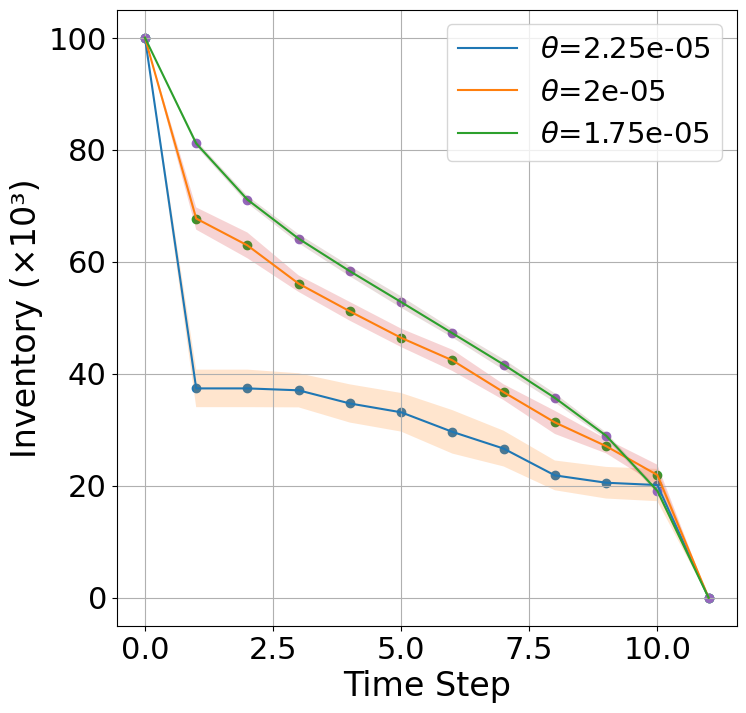

In [16]:
import numpy as np
n=24

time_steps = range(12)
list1 = [results] #, #results_a, results_t]
list1 = [results_t] #, #results_a, results_t]
theta_list = [2.25e-5, 2e-05, 1.75e-5]
j=0
for results in list1:
    plt.figure(figsize=(8, 8))
    for i in results.keys():
        trade_plots = results[i]['inventory']
        print (i, len(trade_plots))
        trade_plots = np.array(trade_plots)
        mean_traj = np.array(trade_plots).mean(axis=0)/10
        std_traj  = np.array(trade_plots).std(axis=0)/10
        upper_bound = mean_traj + std_traj
        lower_bound = mean_traj - std_traj
        plt.scatter(time_steps, mean_traj)
        plt.plot(time_steps, mean_traj,label=fr'$\theta$={theta_list[j]}')
        plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)
        j+=1
    plt.xlabel('Time Step', fontsize = n)
    plt.ylabel('Trade Size', fontsize = n)
    plt.legend(loc = "best", fontsize = n-3)
    plt.tick_params(axis="both", which="major", labelsize=n-2)
    plt.grid(True)
    #plt.savefig('AC_TIM.pdf', bbox_inches = 'tight')
    ax = plt.gca()
    ax.ticklabel_format(axis='y', style='plain')  # disables the 10^3 offset
    ax.set_ylabel("Inventory (×10³)", fontsize=n)
    plt.savefig('theta_trade.pdf', bbox_inches = 'tight')

alpha = 0 10
alpha = 1 10
alpha = 2 10


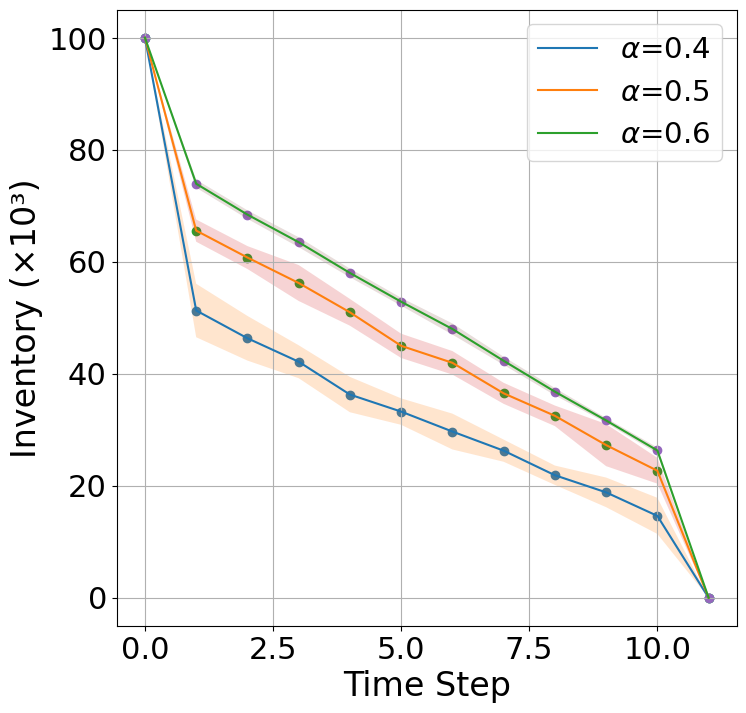

In [17]:
import numpy as np
n=24

time_steps = range(12)
list1 = [results] #, #results_a, results_t]
list1 = [results_a] #, #results_a, results_t]
theta_list = [0.4, 0.5, 0.6]
j=0
for results in list1:
    plt.figure(figsize=(8, 8))
    for i in results.keys():
        trade_plots = results[i]['inventory']
        print (i, len(trade_plots))
        trade_plots = np.array(trade_plots)
        mean_traj = np.array(trade_plots).mean(axis=0)/10
        std_traj  = np.array(trade_plots).std(axis=0)/10
        upper_bound = mean_traj + std_traj
        lower_bound = mean_traj - std_traj
        if i ==0:
            plt.plot(time_steps, mean_traj, '--',label=fr'$\alpha$={theta_list[j]}')
        else:
            plt.scatter(time_steps, mean_traj)
            plt.plot(time_steps, mean_traj,label=fr'$\alpha$={theta_list[j]}')
        plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)
        j+=1
    plt.xlabel('Time Step', fontsize = n)
    plt.ylabel('Trade Size', fontsize = n)
    plt.legend(loc = "best", fontsize = n-3)
    plt.tick_params(axis="both", which="major", labelsize=n-2)
    plt.grid(True)
    #plt.savefig('AC_TIM.pdf', bbox_inches = 'tight')
    ax = plt.gca()
    ax.ticklabel_format(axis='y', style='plain')  # disables the 10^3 offset
    ax.set_ylabel("Inventory (×10³)", fontsize=n)
    plt.savefig('alpha_trade.pdf', bbox_inches = 'tight')

0 10
1 10
2 10


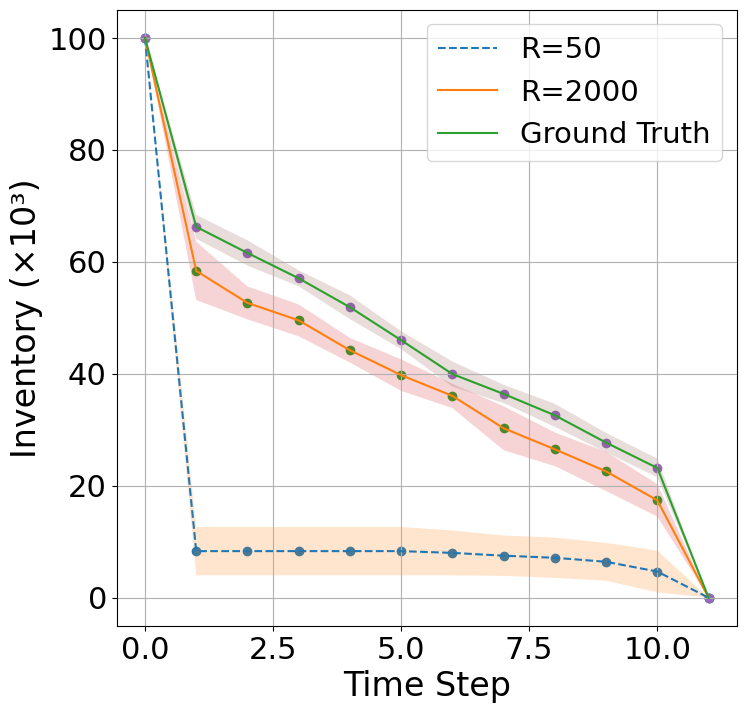

In [30]:
import numpy as np
n=24

time_steps = range(12)
list1 = [results] #, #results_a, results_t]
theta_list = [50, 2000, 'Ground Truth']
j=0
for results in list1:
    plt.figure(figsize=(8, 8))
    for i in results.keys():
        trade_plots = results[i]['inventory']
        print (i, len(trade_plots))
        trade_plots = np.array(trade_plots)
        mean_traj = np.array(trade_plots).mean(axis=0)/10
        std_traj  = np.array(trade_plots).std(axis=0)/10
        upper_bound = mean_traj + std_traj
        lower_bound = mean_traj - std_traj
        plt.scatter(time_steps, mean_traj)
        if i ==0:
            plt.plot(time_steps, mean_traj, '--',label=fr'R={theta_list[j]}')
        elif i == 2:
            plt.plot(time_steps, mean_traj,label=fr'{theta_list[j]}')
        else:
            plt.plot(time_steps, mean_traj,label=fr'R={theta_list[j]}')
        plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)
        j+=1
    plt.xlabel('Time Step', fontsize = n)
    plt.ylabel('Trade Size', fontsize = n)
    plt.legend(loc = "best", fontsize = n-3)
    plt.tick_params(axis="both", which="major", labelsize=n-2)
    plt.grid(True)
    #plt.savefig('AC_TIM.pdf', bbox_inches = 'tight')
    ax = plt.gca()
    ax.ticklabel_format(axis='y', style='plain')  # disables the 10^3 offset
    ax.set_ylabel("Inventory (×10³)", fontsize=n)
    plt.savefig('var_trade.pdf', bbox_inches = 'tight')

0.00225 10
0.0021 10
0.002 10
0.0019 10
0.00175 10
0.4 10
0.5 10
0.6 10


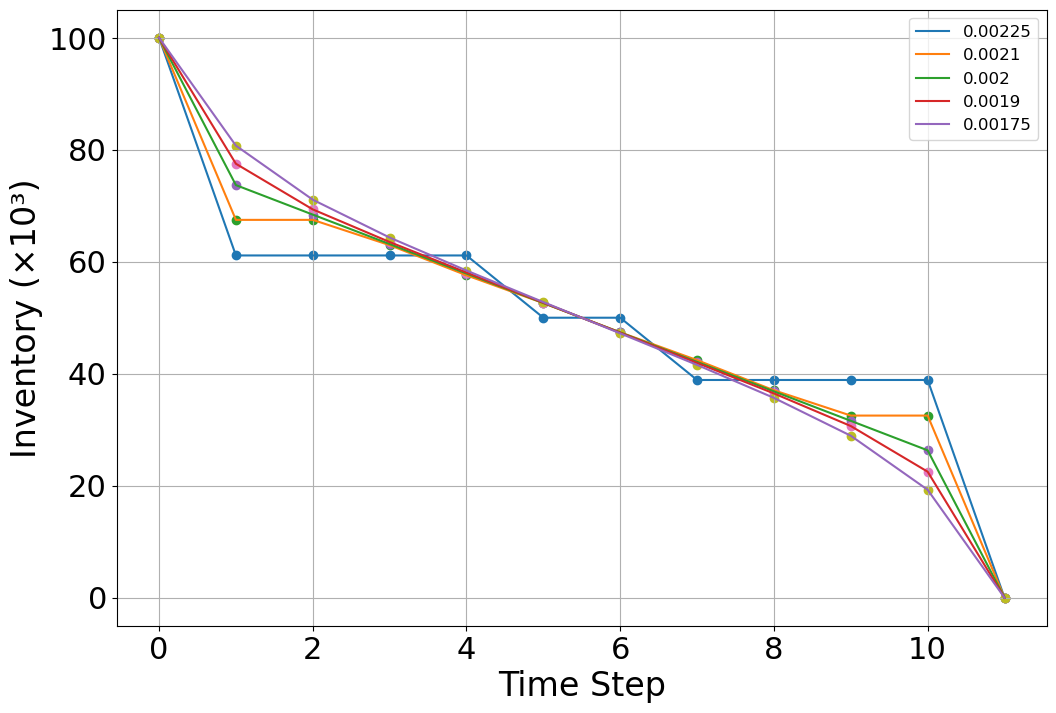

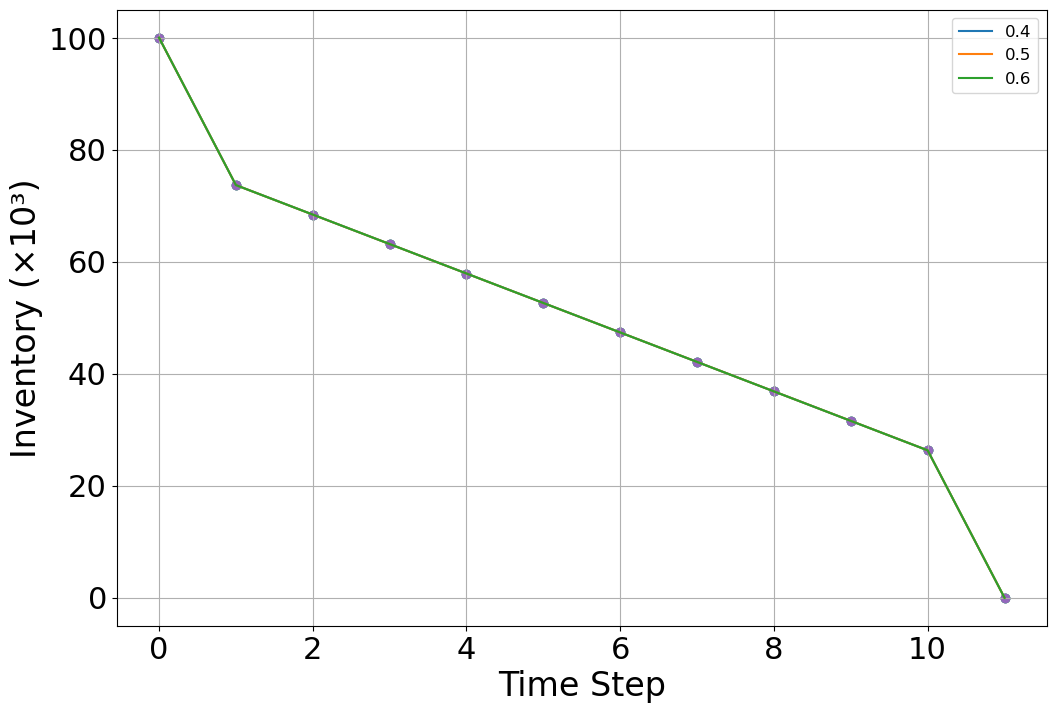

In [20]:
import numpy as np
n=24

time_steps = range(12)
list1 = [results_theta, results_alpha] #, #results_a, results_t]
theta_list = [2.25e-5, 2e-05, 1.75e-5,1]
j=0
for results in list1:
    plt.figure(figsize=(12, 8))
    for i in results.keys():
        trade_plots = results[i]['inventory_runs']
        print (i, len(trade_plots))
        trade_plots = np.array(trade_plots)
        mean_traj = np.array(trade_plots).mean(axis=0)/10
        std_traj  = np.array(trade_plots).std(axis=0)/10
        upper_bound = mean_traj + std_traj
        lower_bound = mean_traj - std_traj
        plt.scatter(time_steps, mean_traj)
        plt.plot(time_steps, mean_traj, label=fr'{i}')
        plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)
        j+=1
    plt.xlabel('Time Step', fontsize = n)
    plt.ylabel('Trade Size', fontsize = n)
    plt.legend(loc = "best", fontsize = n-12)
    plt.tick_params(axis="both", which="major", labelsize=n-2)
    plt.grid(True)
    #plt.savefig('AC_TIM.pdf', bbox_inches = 'tight')
    ax = plt.gca()
    ax.ticklabel_format(axis='y', style='plain')  # disables the 10^3 offset
    ax.set_ylabel("Inventory (×10³)", fontsize=n)
    #plt.savefig('TIM_trade.pdf', bbox_inches = 'tight')

0 10


ValueError: x and y must be the same size

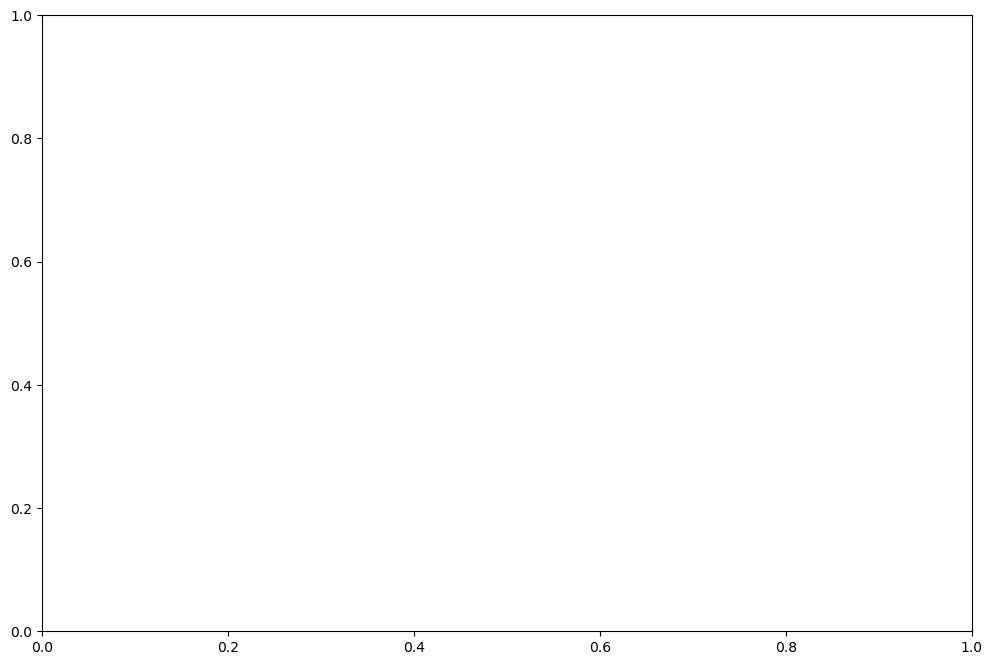

In [15]:
import numpy as np
n=24

time_steps = range(11)
list1 = [results_t] #, #results_a, results_t]
for results in list1:
    plt.figure(figsize=(12, 8))
    for i in results.keys():
        trade_plots = results[i]['inventory']
        print (i, len(trade_plots))
        trade_plots = np.array(trade_plots)
        mean_traj = np.array(trade_plots).mean(axis=0)/10
        std_traj  = np.array(trade_plots).std(axis=0)/10
        upper_bound = mean_traj + std_traj
        lower_bound = mean_traj - std_traj
        plt.scatter(time_steps, mean_traj)
        plt.plot(time_steps, mean_traj, label=fr'$\delta$={i}')
        plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)
    plt.xlabel('Time Step', fontsize = n)
    plt.ylabel('Trade Size', fontsize = n)
    plt.legend(loc = "best", fontsize = n-12)
    plt.tick_params(axis="both", which="major", labelsize=n-2)
    plt.grid(True)
    #plt.savefig('AC_TIM.pdf', bbox_inches = 'tight')
    ax = plt.gca()
    ax.ticklabel_format(axis='y', style='plain')  # disables the 10^3 offset
    ax.set_ylabel("Inventory (×10³)", fontsize=n)
    #plt.savefig('TIM_trade.pdf', bbox_inches = 'tight')

0 10
1 10
2 10
alpha = 0 10
alpha = 1 10
alpha = 2 10
0 10
1 10
2 10


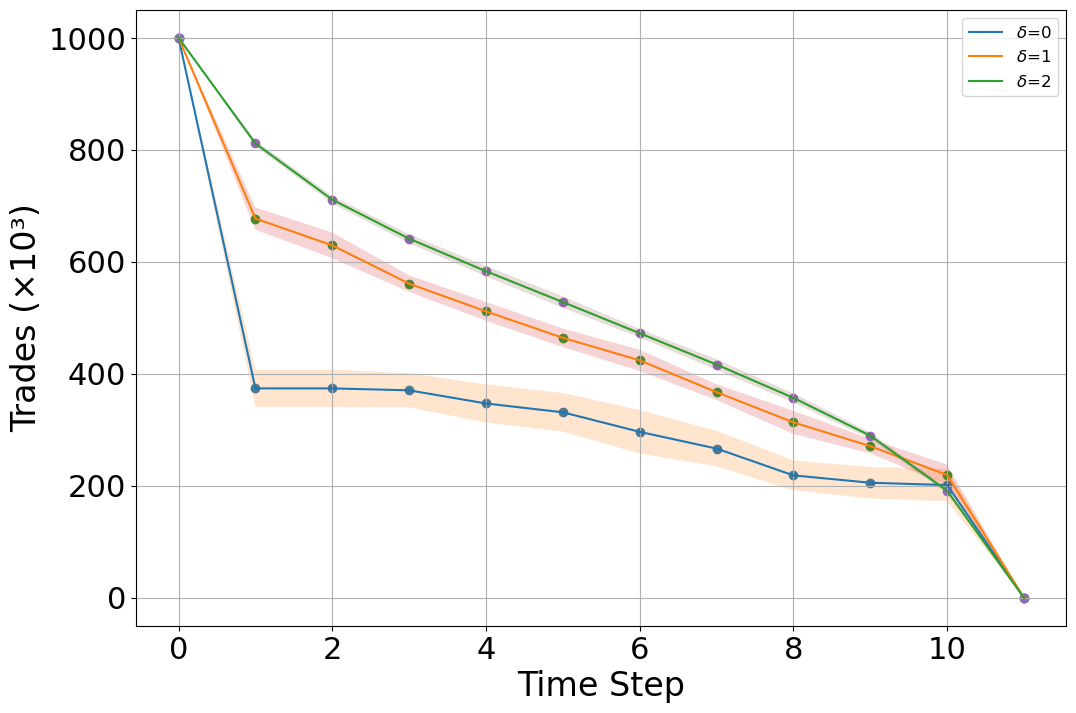

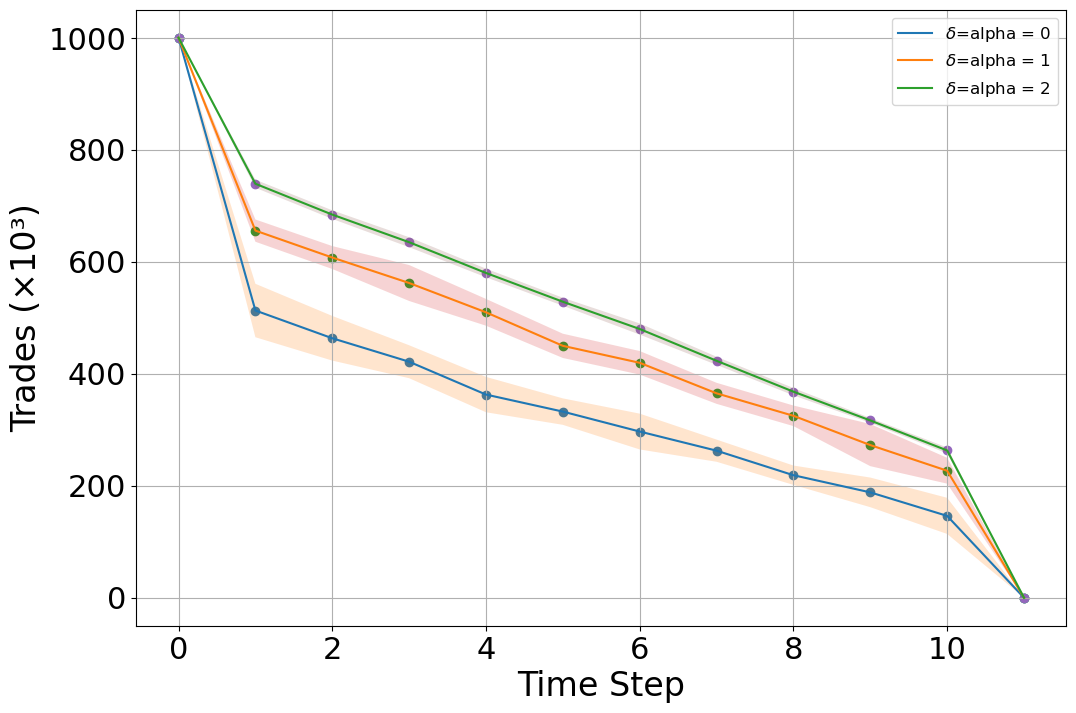

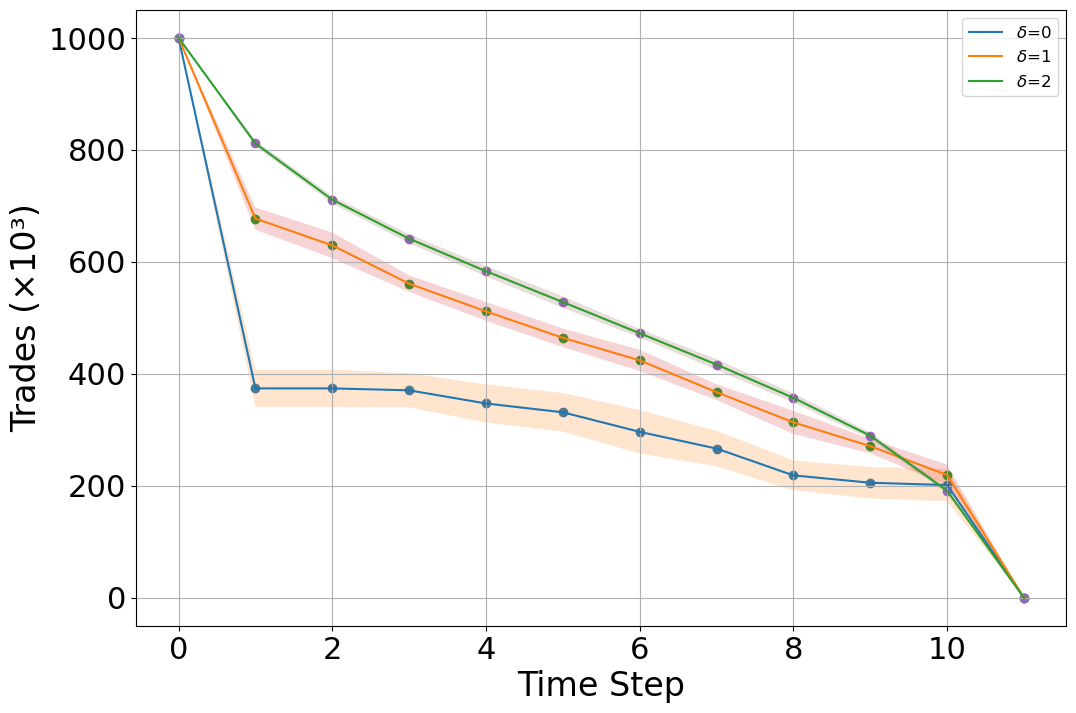

In [22]:
import numpy as np
n=24

time_steps = range(12)
list1 = [results, results_a, results_t]
for results in list1:
    plt.figure(figsize=(12, 8))
    for i in results.keys():
        trade_plots = results[i]['inventory']
        print (i, len(trade_plots))
        trade_plots = np.array(trade_plots)
        mean_traj = np.array(trade_plots).mean(axis=0)
        std_traj  = np.array(trade_plots).std(axis=0)
        upper_bound = mean_traj + std_traj
        lower_bound = mean_traj - std_traj
        plt.scatter(time_steps, mean_traj)
        plt.plot(time_steps, mean_traj, label=fr'$\delta$={i}')
        plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)
    plt.xlabel('Time Step', fontsize = n)
    plt.ylabel('Trade Size', fontsize = n)
    plt.legend(loc = "best", fontsize = n-12)
    plt.tick_params(axis="both", which="major", labelsize=n-2)
    plt.grid(True)
    #plt.savefig('AC_TIM.pdf', bbox_inches = 'tight')
    ax = plt.gca()
    ax.ticklabel_format(axis='y', style='plain')  # disables the 10^3 offset
    ax.set_ylabel("Trades (×10³)", fontsize=n)
    #plt.savefig('TIM_trade.pdf', bbox_inches = 'tight')

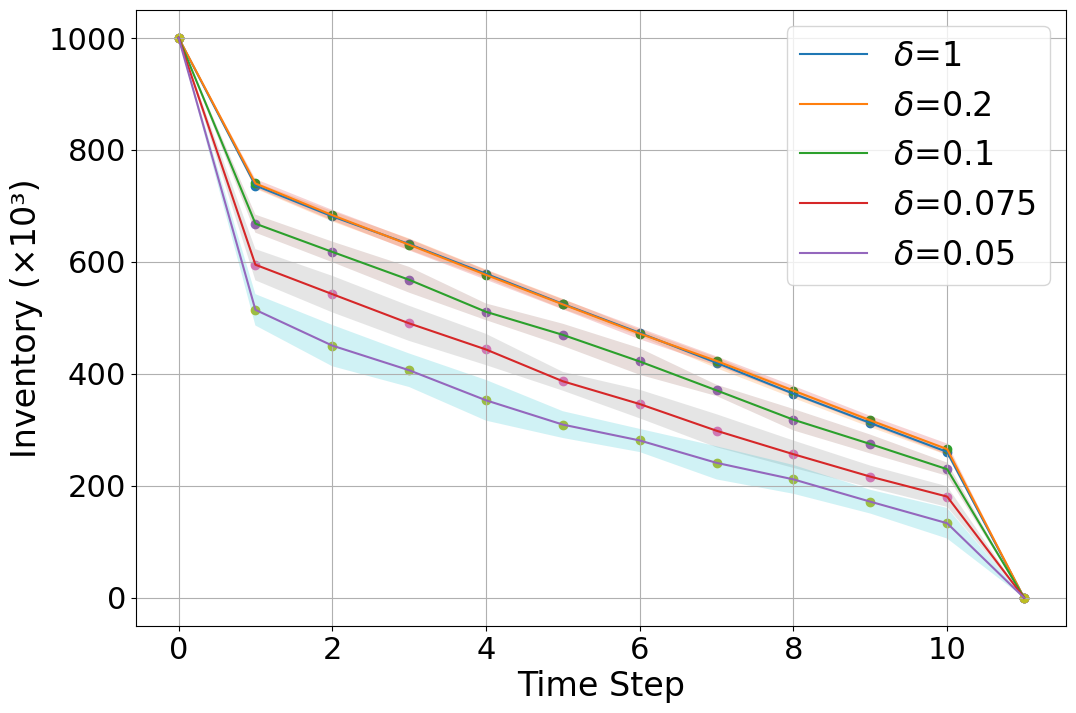

In [ ]:
import numpy as np
plt.figure(figsize=(12, 8))
time_steps = range(12)
sigma = [1, 0.2,0.1,0.075,0.05]
for i in sigma:
    if i !=0.05:
        trade_plots = results[i]['inventory_runs']
    else:
        trade_plots = results['0.05_individual_runs']
        trade_plots = np.array(trade_plots)/100
    mean_traj = np.array(trade_plots).mean(axis=0)
    std_traj  = np.array(trade_plots).std(axis=0)
    upper_bound = mean_traj + std_traj
    lower_bound = mean_traj - std_traj
    plt.scatter(time_steps, mean_traj)
    plt.plot(time_steps, mean_traj, label=fr'$\delta$={i}')
    plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)
    plt.xlabel('Time Step', fontsize = n)
    plt.ylabel('Trade Size', fontsize = n)
    plt.legend(loc = "best", fontsize = n)
    plt.tick_params(axis="both", which="major", labelsize=n-2)
    plt.grid(True)
    ax = plt.gca()
    ax.ticklabel_format(axis='y', style='plain')  # disables the 10^3 offset
    ax.set_ylabel("Inventory (×10³)", fontsize=n)
    plt.savefig('TIM_inventory.pdf', bbox_inches = 'tight')

0.12776666666666667 0.006123361458835791
0.09986666666666669 0.0002867441755680878
0.07496666666666665 0.00012472191289246483
0.05000000000000002 1.3877787807814457e-17


<Figure size 1200x800 with 0 Axes>

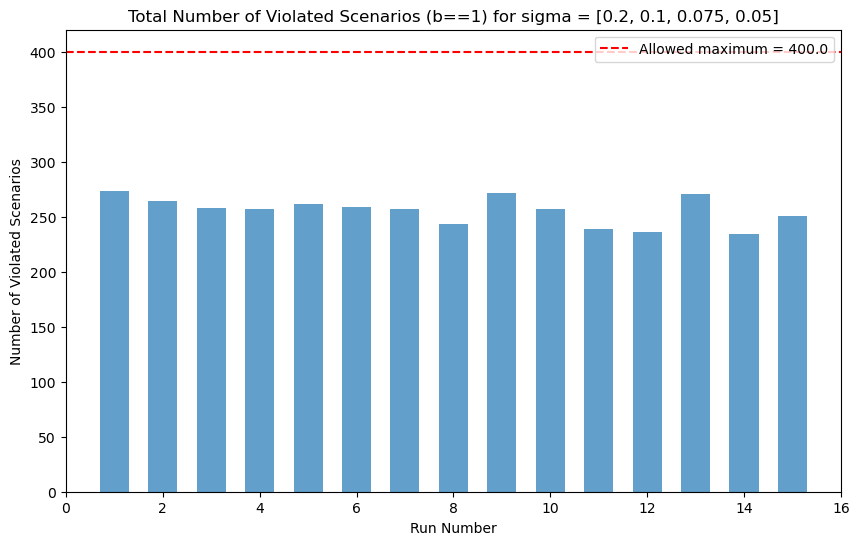

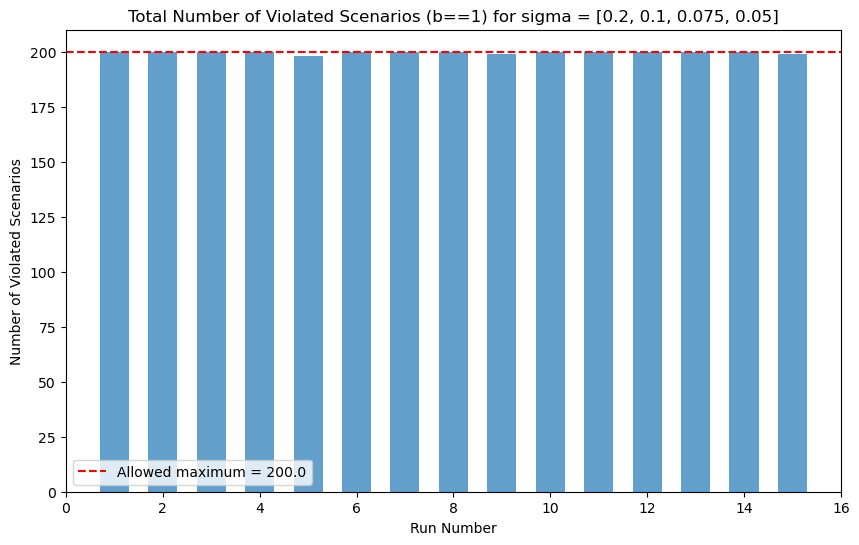

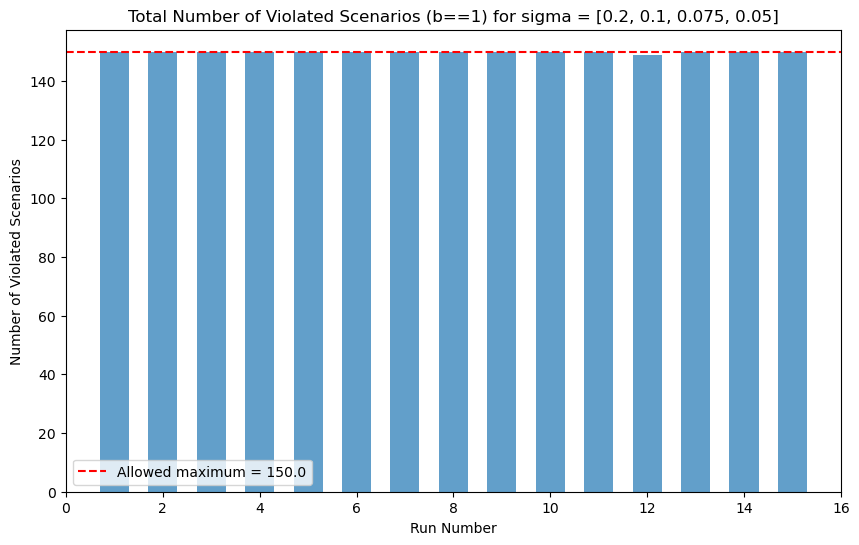

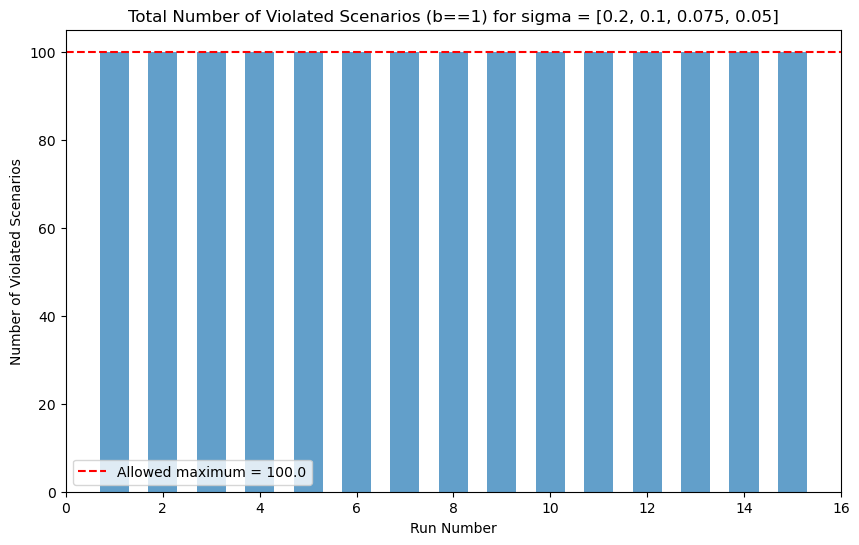

In [13]:
import numpy as np
plt.figure(figsize=(12, 8))
time_steps = range(12)
sigma = [0.2,0.1,0.075,0.05]
m=2000
for i in sigma:
    trade_plots = results[f'{i}_individual_b']
    b_runs = trade_plots # List of b-variable lists (one per run)
    flagged_counts = [sum(b_run) for b_run in b_runs]  # Total # of flags in each run
    prob = np.array(flagged_counts)/m
    mean, std = prob.mean(), prob.std()
    print(mean, std)
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(flagged_counts)+1), flagged_counts, width= 0.6, alpha=0.7)
    plt.axhline(y=i * m, color='r', linestyle='--',
                label=f'Allowed maximum = {i*m}')
    plt.xlabel("Run Number")
    plt.ylabel("Number of Violated Scenarios")
    plt.xlim(0,16)
    plt.title(f"Total Number of Violated Scenarios (b==1) for sigma = {sigma}")
    plt.legend()
    # mean_traj = np.array(trade_plots).mean(axis=0)
    # std_traj  = np.array(trade_plots).std(axis=0)
    # upper_bound = mean_traj + std_traj
    # lower_bound = mean_traj - std_traj
    # plt.scatter(time_steps, mean_traj)
    # plt.plot(time_steps, mean_traj, label=f'Delta={i}')
    # plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)
    # plt.xlabel('Time Step', fontsize = n)
    # plt.ylabel('Trade Size', fontsize = n)
    # plt.legend(loc = "best", fontsize = n)
    # plt.tick_params(axis="both", which="major", labelsize=n-2)
    # plt.grid(True)
    # plt.savefig('AC_TIM.pdf', bbox_inches = 'tight')
    # ax = plt.gca()
    # ax.ticklabel_format(axis='y', style='plain')  # disables the 10^3 offset
    # ax.set_ylabel("Inventory (×10³)", fontsize=n)
    # plt.savefig('TIM_inventory.pdf', bbox_inches = 'tight')